<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
import numpy as np

def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros_like(V)  # Инициализация результата нулевым вектором той же размерности, что и входной вектор
    for i in range(len(X)):
        result += np.dot(X[i], V[i])  # Умножение i-ой матрицы на i-ый вектор и добавление результата к общему результату
    return result

# Пример использования
X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]  # Пример набора матриц
V = [np.array([[1], [2]]), np.array([[3], [4]])]  # Пример набора векторов
print(sum_prod(X, V))  # Выведет [[17], [37]]


[[[44]
  [64]]

 [[44]
  [64]]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [15]:
def binarize_matrix(matrix, threshold):
  binarized_matrix = np.copy(matrix)
  binarized_matrix[binarized_matrix > threshold] = 1
  binarized_matrix[binarized_matrix <= threshold] = 0
  return binarized_matrix

# Пример использования
matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
threshold = 5
binarized_matrix = binarize_matrix(matrix, threshold)
print(binarized_matrix)

# [[0 0 1]
#  [1 1 1]
#  [1 1 1]]


[[0 0 0]
 [0 0 0]
 [0 0 0]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [16]:
import numpy as np

def unique_rows(mat):
    return np.array([np.unique(row) for row in mat])

def unique_columns(mat):
    return np.array([np.unique(col) for col in mat.T])

# Пример использования
mat = np.array([[1, 2, 3],
                [4, 5, 6],
                [1, 2, 3]])

print("Уникальные элементы из каждой строки:")
print(unique_rows(mat))

print("Уникальные элементы из каждого столбца:")
print(unique_columns(mat))

Уникальные элементы из каждой строки:
[[1 2 3]
 [4 5 6]
 [1 2 3]]
Уникальные элементы из каждого столбца:
[[1 4]
 [2 5]
 [3 6]]


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

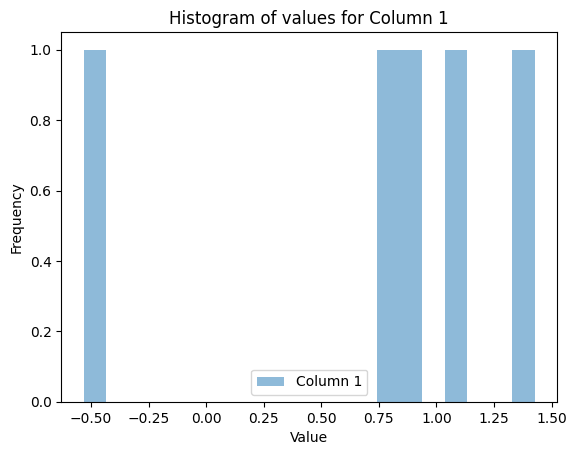

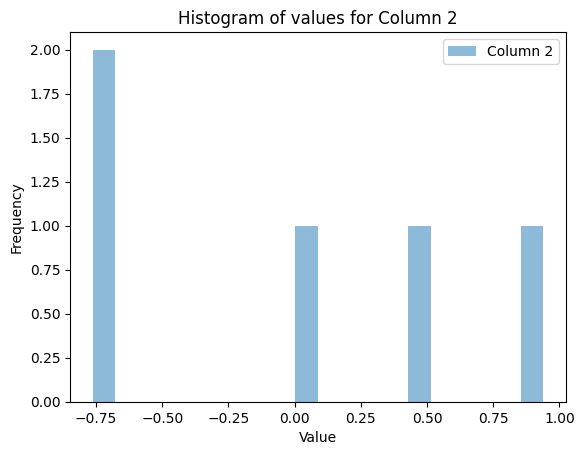

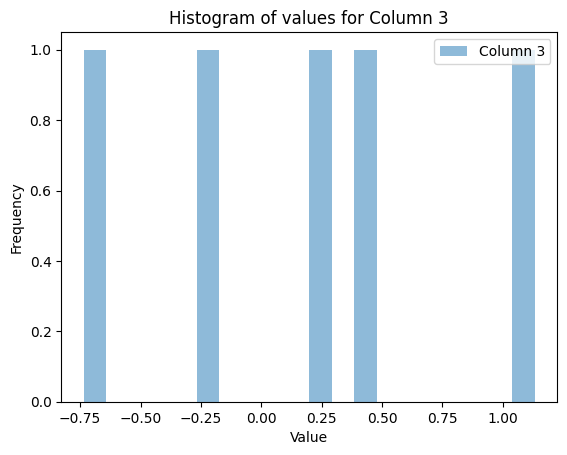

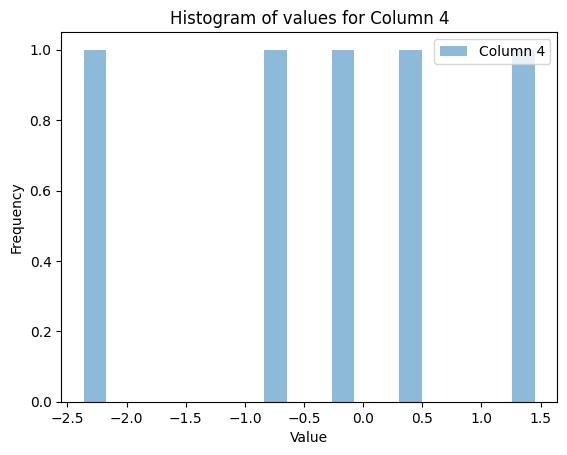

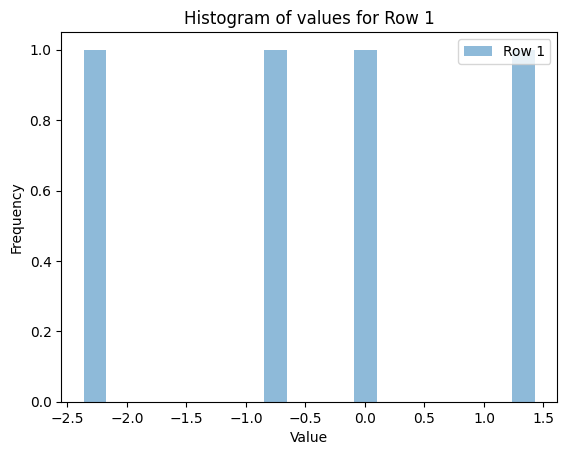

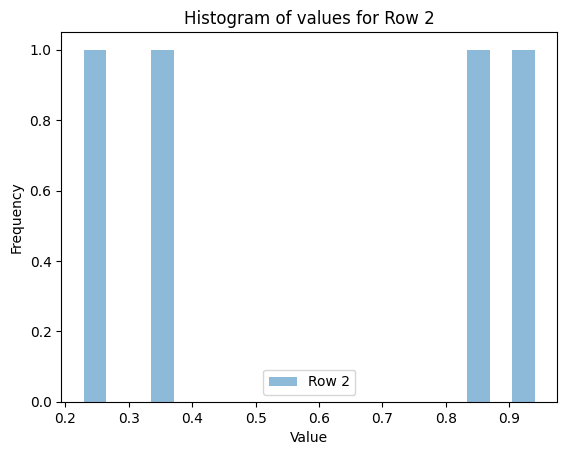

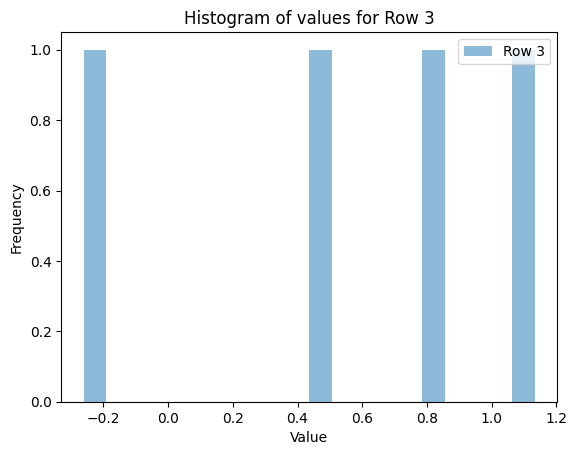

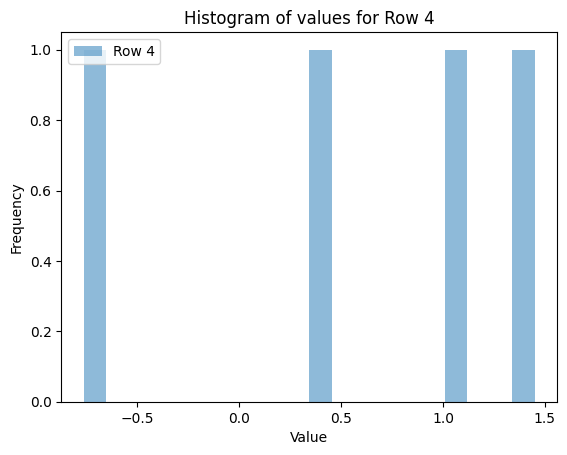

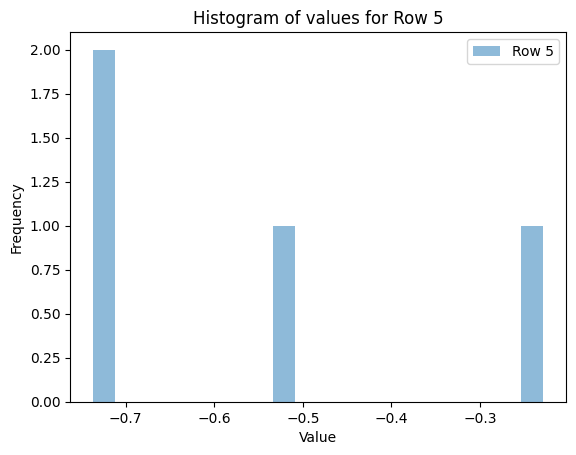

Means and variances for columns:
Column 1: Mean=0.7362495827555742, Variance=0.44909574994538437
Column 2: Mean=-0.0022272794573835243, Variance=0.4462172688525339
Column 3: Mean=0.1641985331664034, Variance=0.39424217349354784
Column 4: Mean=-0.3145414013053617, Variance=1.5819019124317104

Means and variances for rows:
Row 1: Mean=-0.39596053427197253, Variance=1.8830840120392858
Row 2: Mean=0.5936186439879321, Variance=0.0985861704672144
Row 3: Mean=0.5358935702909776, Variance=0.2673972470352983
Row 4: Mean=0.5546309820905068, Variance=0.7158072948663455
Row 5: Mean=-0.5585833681484034, Variance=0.04342331854725057


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def fill_matrix(m, n):
    # Заполняем матрицу случайными числами из нормального распределения
    matrix = np.random.normal(size=(m, n))
    
    # Рассчитываем математическое ожидание и дисперсию для каждого столбца и строки
    col_means = np.mean(matrix, axis=0)
    col_variances = np.var(matrix, axis=0)
    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)
    
    # Строим гистограммы для каждого столбца
    for i in range(n):
        plt.hist(matrix[:, i], bins=20, alpha=0.5, label=f'Column {i+1}')
        plt.title(f'Histogram of values for Column {i+1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
    
    # Строим гистограммы для каждой строки
    for i in range(m):
        plt.hist(matrix[i, :], bins=20, alpha=0.5, label=f'Row {i+1}')
        plt.title(f'Histogram of values for Row {i+1}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()
    
    return col_means, col_variances, row_means, row_variances

# Пример использования
m = 5  # количество строк
n = 4  # количество столбцов

col_means, col_variances, row_means, row_variances = fill_matrix(m, n)
print("Means and variances for columns:")
for i in range(n):
    print(f"Column {i+1}: Mean={col_means[i]}, Variance={col_variances[i]}")

print("\nMeans and variances for rows:")
for i in range(m):
    print(f"Row {i+1}: Mean={row_means[i]}, Variance={row_variances[i]}")

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [18]:
import numpy as np

def chess(m, n, a, b):
    matrix = np.zeros((m, n), dtype=int)

    for i in range(m):
        for j in range(n):
            # Определяем значение для текущей ячейки в зависимости от расположения на шахматной доске
            if (i + j) % 2 == 0:
                matrix[i][j] = a
            else:
                matrix[i][j] = b
    
    return matrix

# Пример использования
m = 5  # количество строк
n = 5  # количество столбцов
a = 1  # значение для чётных ячеек
b = 0  # значение для нечётных ячеек

result = chess(m, n, a, b)
print(result)


[[1 0 1 0 1]
 [0 1 0 1 0]
 [1 0 1 0 1]
 [0 1 0 1 0]
 [1 0 1 0 1]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

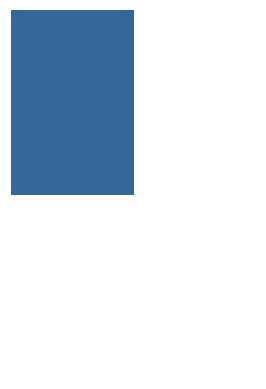

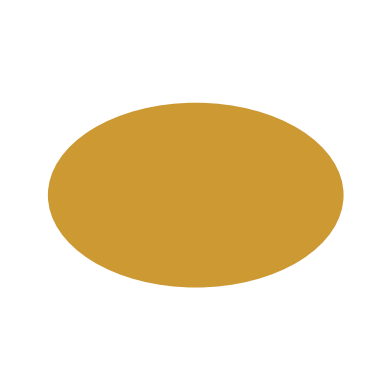

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse

def rectangle(image_size, rect_size, rect_color, background_color=(1, 1, 1)):
    # Создаем новое изображение с заданным размером и цветом фона
    image = np.ones((image_size[1], image_size[0], 3)) * background_color
    
    # Создаем прямоугольник
    rect = Rectangle((0, 0), rect_size[0], rect_size[1], facecolor=rect_color)
    
    # Добавляем прямоугольник на изображение
    plt.imshow(image)
    plt.gca().add_patch(rect)
    plt.axis('off')  # Отключаем оси координат
    plt.show()

def ellipse(image_size, ellipse_axes, ellipse_color, background_color=(1, 1, 1)):
    # Создаем новое изображение с заданным размером и цветом фона
    image = np.ones((image_size[1], image_size[0], 3)) * background_color
    
    # Создаем овал
    ellipse = Ellipse((image_size[0] // 2, image_size[1] // 2), width=ellipse_axes[0]*2, height=ellipse_axes[1]*2,
                      facecolor=ellipse_color)
    
    # Добавляем овал на изображение
    plt.imshow(image)
    plt.gca().add_patch(ellipse)
    plt.axis('off')  # Отключаем оси координат
    plt.show()

# Тесты
rectangle((200, 300), (100, 150), (0.2, 0.4, 0.6))  # Прямоугольник размером 100x150, синего цвета
ellipse((200, 200), (80, 50), (0.8, 0.6, 0.2))     # Овал с полуосями 80 и 50, оранжевого цвета


<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Математическое ожидание: 5.0
Дисперсия: 6.666666666666667
СКО: 2.581988897471611
Локальные максимумы: [(2, 8), (5, 7), (7, 9)]
Локальные минимумы: [(4, 2), (6, 5)]
Скользящее среднее: [5.666666666666667, 6.0, 4.666666666666667, 4.333333333333333, 4.666666666666667, 7.0, 5.0]


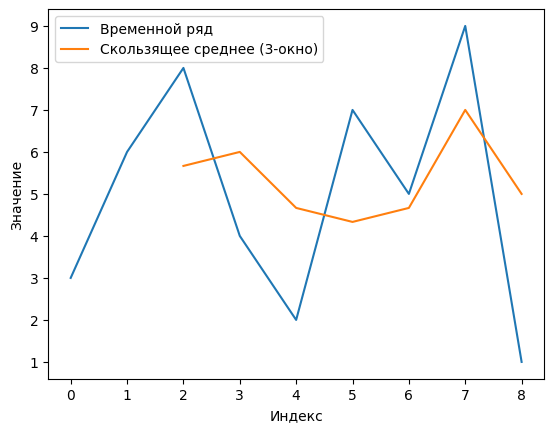

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def compute_statistics(time_series):
    mean = np.mean(time_series)
    variance = np.var(time_series)
    std_dev = np.sqrt(variance)
    return mean, variance, std_dev

def find_local_extremes(time_series):
    local_maxima = []
    local_minima = []
    for i in range(1, len(time_series) - 1):
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_maxima.append((i, time_series[i]))
        elif time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_minima.append((i, time_series[i]))
    return local_maxima, local_minima

def moving_average(time_series, window_size):
    moving_avg = []
    for i in range(len(time_series) - window_size + 1):
        window = time_series[i:i + window_size]
        moving_avg.append(np.mean(window))
    return moving_avg

# Пример использования
time_series = [3, 6, 8, 4, 2, 7, 5, 9, 1]
mean, variance, std_dev = compute_statistics(time_series)
print("Математическое ожидание:", mean)
print("Дисперсия:", variance)
print("СКО:", std_dev)

local_maxima, local_minima = find_local_extremes(time_series)
print("Локальные максимумы:", local_maxima)
print("Локальные минимумы:", local_minima)

window_size = 3
moving_avg_series = moving_average(time_series, window_size)
print("Скользящее среднее:", moving_avg_series)

# Визуализация временного ряда и скользящего среднего
plt.plot(time_series, label='Временной ряд')
plt.plot(range(window_size - 1, len(time_series)), moving_avg_series, label=f'Скользящее среднее ({window_size}-окно)')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.show()


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [21]:
def one_hot_encoding(labels):
 
    num_classes = max(labels) + 1
    encoding = []
    for label in labels:
        one_hot_vector = [0] * num_classes
        one_hot_vector[label] = 1
        encoding.append(one_hot_vector)
    return encoding

# Пример использования
labels = [0, 2, 3, 0]
print(one_hot_encoding(labels))


[[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]
